In [7]:
pip install xlrd

Note: you may need to restart the kernel to use updated packages.


In [8]:
import pandas as pd
import numpy as np
pd.set_option('future.no_silent_downcasting', True)
# Load the Excel file and select necessary columns
df = pd.read_excel(
    'En_In.xls',  # File name
    skiprows=17,  # Skip rows
    usecols="C:F",  # Select columns
    names=['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable'],  # Rename columns
    engine='xlrd'  # Specify Excel engine
)

# Remove the last 38 rows
df = df.iloc[:-38]

# Reset the index to start from 1
df.index = pd.RangeIndex(start=1, stop=len(df) + 1)

df

,Country,Energy Supply,Energy Supply per Capita,% Renewable
1,Afghanistan,321,10,78.669280
2,Albania,102,35,100.000000
3,Algeria,1959,51,0.551010
4,American Samoa,...,...,0.641026
5,Andorra,9,121,88.695650
...,...,...,...,...
223,Viet Nam,2554,28,45.321520
224,Wallis and Futuna Islands,0,26,0.000000
225,Yemen,344,13,0.000000
226,Zambia,400,26,99.714670


In [9]:
# Convert 'Energy Supply' column to numeric, coercing errors to NaN
df['Energy Supply'] = pd.to_numeric(df['Energy Supply'], errors='coerce')

# Multiply 'Energy Supply' values by 1,000,000
df['Energy Supply'] *= 1_000_000

# Replace '...' with NaN
df.replace(to_replace="...", value=np.nan, inplace=True)

df.head()

,Country,Energy Supply,Energy Supply per Capita,% Renewable
1,Afghanistan,3.210000e+08,10,78.669280
2,Albania,1.020000e+08,35,100.000000
3,Algeria,1.959000e+09,51,0.551010
4,American Samoa,NaN,NaN,0.641026
5,Andorra,9.000000e+06,121,88.695650


In [10]:
# Remove any text in parentheses from the 'Country' column
df['Country'] = df['Country'].str.replace(r'\s*\(.*?\)', '', regex=True)

# Remove any digits from the 'Country' column
df['Country'] = df['Country'].str.replace(r'\d+', '', regex=True)

# Remove leading and trailing whitespace from the 'Country' column
df['Country'] = df['Country'].str.strip()

# Display specific rows for inspection
df.loc[[24, 197, 98]]

,Country,Energy Supply,Energy Supply per Capita,% Renewable
24,Bhutan,6.300000e+07,83,100.00000
197,Sweden,2.044000e+09,212,46.59846
98,Indonesia,8.754000e+09,35,12.18904


In [11]:
# Define a dictionary for country name replacements
country_replacements = {
    "Republic of Korea": "South Korea",
    "United States of America": "United States",
    "United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
    "China, Hong Kong Special Administrative Region": "Hong Kong"
}

# Replace country names based on the dictionary
df['Country'] = df['Country'].replace(country_replacements)

# Display rows where 'Country' is in the specified list
df[df['Country'].isin(['American Samoa', 'South Korea', 'Bolivia'])]

,Country,Energy Supply,Energy Supply per Capita,% Renewable
4,American Samoa,NaN,NaN,0.641026
25,Bolivia,3.360000e+08,32,31.477120
165,South Korea,1.100700e+10,221,2.279353


In [12]:
# Load the GDP CSV file, skipping the first 4 rows
GDP = pd.read_csv(
    "gpd.csv",
    skiprows=4
)

# Define a dictionary for country name replacements in the GDP data
country_gdp_replacements = {
    "Korea, Rep.": "South Korea",
    "Iran, Islamic Rep.": "Iran",
    "Hong Kong SAR, China": "Hong Kong"
}

# Replace country names in the first column based on the dictionary
GDP.iloc[:, 0] = GDP.iloc[:, 0].replace(country_gdp_replacements)

# Display the first row for inspection
GDP.head(1)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Aruba,ABW,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.467704e+09,NaN,NaN,NaN,NaN,NaN


In [13]:
# Load the Sciamgo Journal Excel file
sciamgo = pd.read_excel(
    'scimagojr.xlsx',  # File name
    engine='openpyxl'  # Specify the Excel engine
)

# Display the first three rows for inspection
sciamgo.head(3)

,Rank,Country,Documents,Citable documents,Citations,Self-citations,Citations per document,H index
0,1,China,127050,126767,597237,411683,4.70,138
1,2,United States,96661,94747,792274,265436,8.20,230
2,3,Japan,30504,30287,223024,61554,7.31,134


In [14]:
# Rename the 'Country Name' column to 'Country'
GDP.rename(columns={'Country Name': 'Country'}, inplace=True)

In [15]:
# Filter to get the top 15 ranks
sciamgo_top15 = sciamgo[sciamgo['Rank'] <= 15]

In [16]:
# Select 'Country' and the last 10 years of GDP data
gdp_last_10_years = GDP[['Country'] + [str(year) for year in range(2006, 2016)]]

# Merge Sciamgo top 15 data with GDP data based on 'Country'
merged = pd.merge(sciamgo_top15, gdp_last_10_years, on='Country', how='inner')

# Merge the resulting DataFrame with the 'df' DataFrame on 'Country'
Result = pd.merge(merged, df, on='Country', how='inner')

# Set 'Country' as the index
Result.set_index('Country', inplace=True)

# Define the columns to keep in the final DataFrame
columns = ['Rank', 'Documents', 'Citable documents', 'Citations', 
           'Self-citations', 'Citations per document', 'H index', 
           'Energy Supply', 'Energy Supply per Capita', '% Renewable'] + \
          [str(year) for year in range(2006, 2016)]

# Select only the specified columns in the desired order
Result = Result[columns]

Result

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,,,,,
China,1,127050,126767,597237,411683,4.70,138,1.271910e+11,93,19.754910,3.992331e+12,4.559041e+12,4.997775e+12,5.459247e+12,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12
United States,2,96661,94747,792274,265436,8.20,230,9.083800e+10,286,11.570980,1.479230e+13,1.505540e+13,1.501149e+13,1.459484e+13,1.496437e+13,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13
Japan,3,30504,30287,223024,61554,7.31,134,1.898400e+10,149,10.232820,5.496542e+12,5.617036e+12,5.558527e+12,5.251308e+12,5.498718e+12,5.473738e+12,5.569102e+12,5.644659e+12,5.642884e+12,5.669563e+12
United Kingdom,4,20944,20357,206091,37874,9.84,139,7.920000e+09,124,10.600470,2.419631e+12,2.482203e+12,2.470614e+12,2.367048e+12,2.403504e+12,2.450911e+12,2.479809e+12,2.533370e+12,2.605643e+12,2.666333e+12
Russian Federation,5,18534,18301,34266,12422,1.85,57,3.070900e+10,214,17.288680,1.385793e+12,1.504071e+12,1.583004e+12,1.459199e+12,1.524917e+12,1.589943e+12,1.645876e+12,1.666934e+12,1.678709e+12,1.616149e+12
Canada,6,17899,17620,215003,40930,12.01,149,1.043100e+10,296,61.945430,1.564469e+12,1.596740e+12,1.612713e+12,1.565145e+12,1.613406e+12,1.664087e+12,1.693133e+12,1.730688e+12,1.773486e+12,1.792609e+12
Germany,7,17027,16831,140566,27426,8.26,126,1.326100e+10,165,17.901530,3.332891e+12,3.441561e+12,3.478809e+12,3.283340e+12,3.417298e+12,3.542371e+12,3.556724e+12,3.567317e+12,3.624386e+12,3.685556e+12
India,8,15005,14841,128763,37209,8.58,115,3.319500e+10,26,14.969080,1.265894e+12,1.374865e+12,1.428361e+12,1.549483e+12,1.708459e+12,1.821872e+12,1.924235e+12,2.051982e+12,2.200617e+12,2.367206e+12
France,9,13153,12973,130632,28601,9.93,114,1.059700e+10,166,17.020280,2.607840e+12,2.669424e+12,2.674637e+12,2.595967e+12,2.646995e+12,2.702032e+12,2.706968e+12,2.722567e+12,2.729632e+12,2.761185e+12


In [17]:
def task_eight():
    # Calculate the average GDP from 2006 to 2015 and add it as a new column
    Result['Average GDP (2006-2015)'] = Result.loc[:, '2006':'2015'].mean(axis=1)

    # Sort the average GDP values in descending order
    top_15 = Result['Average GDP (2006-2015)'].sort_values(ascending=False)

    return top_15
# Call the function to execute it
task_eight()

Country
United States         1.536434e+13
China                 6.348609e+12
Japan                 5.542208e+12
Germany               3.493025e+12
France                2.681725e+12
United Kingdom        2.487907e+12
Brazil                2.189794e+12
Italy                 2.120175e+12
India                 1.769297e+12
Canada                1.660647e+12
Russian Federation    1.565459e+12
Spain                 1.418078e+12
Australia             1.164043e+12
South Korea           1.106715e+12
Iran                  4.441558e+11
Name: Average GDP (2006-2015), dtype: float64

In [18]:
def task_nine():
    # Calculate the average GDP from 2006 to 2015 and add it as a new column
    Result['Average GDP (2006-2015)'] = Result.loc[:, '2006':'2015'].mean(axis=1)

    # Get the fifth largest country by average GDP
    fifth_largest_country = Result['Average GDP (2006-2015)'].sort_values(ascending=False).index[4]

    # Calculate the change in GDP from 2006 to 2015 for the fifth largest country
    GDP_change = float(Result.loc[fifth_largest_country, '2015'] - Result.loc[fifth_largest_country, '2006'])

    return (fifth_largest_country, GDP_change)
    
# Call the function to execute it
task_nine()

('France', 153345695364.24023)

In [19]:
def task_ten():
    # Find the country with the maximum percentage of renewable energy
    max_renewable_country = Result['% Renewable'].idxmax()

    # Get the maximum renewable energy value
    max_renewable_value = float(Result['% Renewable'].max())

    return (max_renewable_country, max_renewable_value)

# Call the function to execute it
task_ten()

('Brazil', 69.64803)

In [20]:
def task_eleven():
    # Estimate the population based on energy supply and energy supply per capita
    Result['Estimated Population'] = Result['Energy Supply'] / Result['Energy Supply per Capita']

    # Find the sixth most populous country
    sixth_most_populous_country = Result['Estimated Population'].sort_values(ascending=False).index[5]

    # Retrieve the estimated population of the sixth most populous country
    population = Result.loc[sixth_most_populous_country, 'Estimated Population']

    return (sixth_most_populous_country, population)

# Call the function to execute it
task_eleven()


('Japan', 127409395.97315437)

In [21]:
def task_twelve():
    # Calculate Citable Documents per Capita
    Result['Citable Documents per Capita'] = Result['Citable documents'] / Result['Estimated Population']
    
    # Calculate the correlation between Citable Documents per Capita and Energy Supply per Capita
    correlation = float(Result['Citable Documents per Capita'].corr(Result['Energy Supply per Capita']))
    
    return correlation

# Call the function to execute it
task_twelve()

0.7940010435442946

In [22]:
def task_thirteen():
    # Calculate the median of the '% Renewable' column
    median = Result['% Renewable'].median()

    # Create a new column indicating if the % Renewable is above the median
    Result['Above median renewable'] = (Result['% Renewable'] >= median).astype(int)

    return Result['Above median renewable']

# Call the function to execute it
task_thirteen()

Country
China                 1
United States         0
Japan                 0
United Kingdom        0
Russian Federation    1
Canada                1
Germany               1
India                 0
France                1
South Korea           0
Italy                 1
Spain                 1
Iran                  0
Australia             0
Brazil                1
Name: Above median renewable, dtype: int64

In [23]:
ContinentDict = {
        'China': 'Asia',
        'United States': 'North America',
        'Japan': 'Asia',
        'United Kingdom': 'Europe',
        'Russian Federation': 'Europe',
        'Canada': 'North America',
        'Germany': 'Europe',
        'India': 'Asia',
        'France': 'Europe',
        'South Korea': 'Asia',
        'Italy': 'Europe',
        'Spain': 'Europe',
        'Iran': 'Asia',
        'Australia': 'Australia',
        'Brazil': 'South America'
    }

In [24]:
def task_forteen():
    # Map countries to continents using ContinentDict and create a new column
    Result['Continent'] = Result.index.map(ContinentDict)
    
    # Group by 'Continent' and aggregate population statistics
    grouped = Result.groupby('Continent')['Estimated Population']
    
    summary_df = grouped.agg(['size', 'sum', 'mean', 'std']).reset_index()
    
    # Set 'Continent' as the index for the summary DataFrame
    summary_df.set_index('Continent', inplace=True)
    
    return summary_df

# Call the function to execute it
task_forteen()

,size,sum,mean,std
Continent,,,,
Asia,5,2898666386.6106,579733277.32212,6.790979e+08
Australia,1,23316017.316017,23316017.316017,NaN
Europe,6,457929667.216372,76321611.202729,3.464767e+07
North America,2,352855249.48025,176427624.740125,1.996696e+08
South America,1,205915254.237288,205915254.237288,NaN


In [27]:
import matplotlib.pyplot as plt

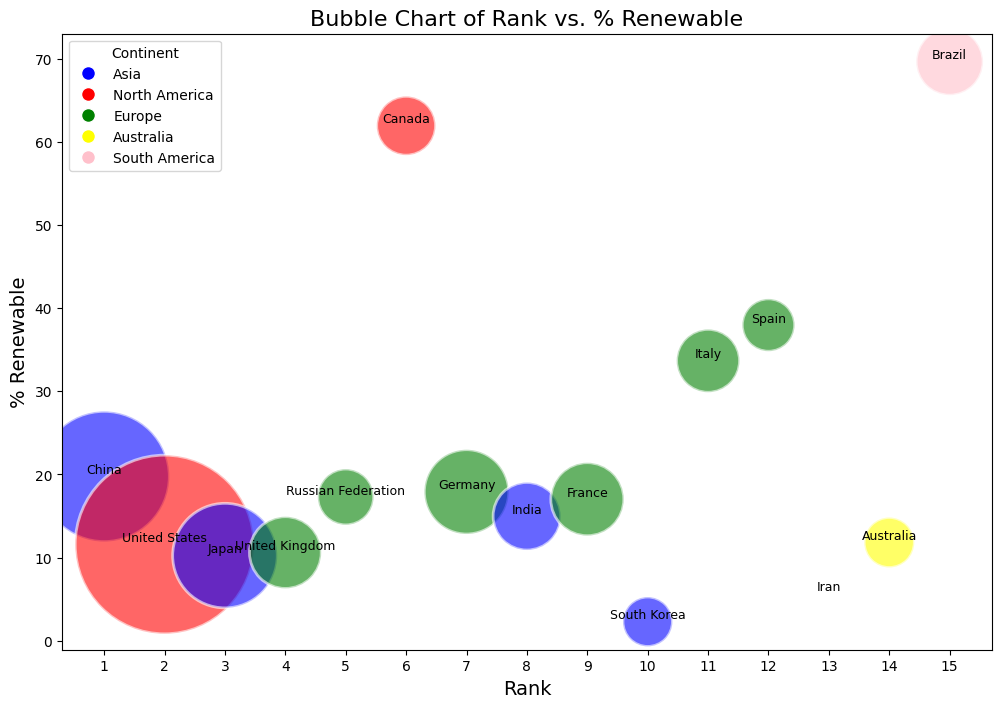

In [28]:
x = Result['Rank']
y = Result['% Renewable']
size = Result['2015'] / 1e9  

color_map = {
    'Asia': 'blue',           # Yeni renk
    'North America': 'red',   # Yeni renk
    'Europe': 'green',        # Yeni renk
    'Australia': 'yellow',    # Yeni renk
    'South America': 'pink'   # Yeni renk
}

plt.figure(figsize=(12, 8))
bubble = plt.scatter(x, y, s=size, c=Result['Continent'].map(color_map), alpha=0.6, edgecolors="w", linewidth=2)

for i in range(len(Result)):
    country = Result.index[i]
    plt.text(x.iloc[i], y.iloc[i], country, fontsize=9, ha='center', va='bottom')

plt.title('Bubble Chart of Rank vs. % Renewable', fontsize=16)
plt.xlabel('Rank', fontsize=14)
plt.ylabel('% Renewable', fontsize=14)

plt.xticks(ticks=range(1, 16))

plt.grid(False)

handles = []
for continent, color in color_map.items():
    handles.append(plt.Line2D([0], [0], marker='o', color='w', label=continent,
                                markerfacecolor=color, markersize=10))
plt.legend(handles=handles, title='Continent')

plt.show()
